# 🧠 Stroke Prediction using Machine Learning

This project aims to build a machine learning model to predict the likelihood of a stroke based on health and demographic data. 
Given the medical importance, the focus is on **maximizing recall** to reduce the chance of missing patients who may be at risk.


## 📥 Step 1: Importing Libraries

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE


## 📥 Step 2: Data Loading and Initial Exploration

In [77]:
stroke_data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [78]:
stroke_data.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [79]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [80]:
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [81]:
stroke_data['stroke'].value_counts()


stroke
0    4861
1     249
Name: count, dtype: int64

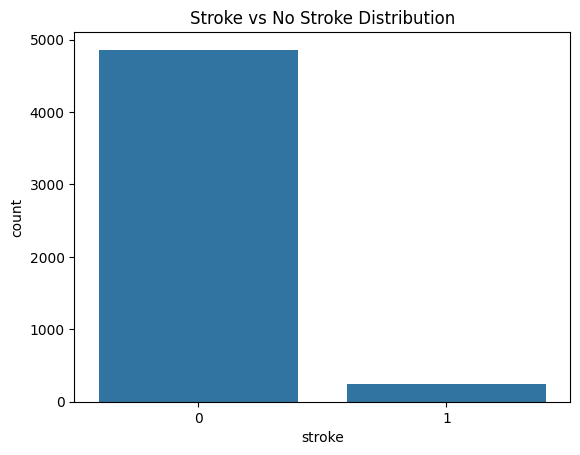

In [82]:
sns.countplot(x='stroke', data=stroke_data)
plt.title("Stroke vs No Stroke Distribution")
plt.show()

## 📥 Step 3: Missing Values Check and Imputation


In [83]:
missing_counts = stroke_data.isnull().sum()
print(missing_counts)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


It shows that out of 5100 patients, 249 patients had stroke and the rest 4861 didnt. 

In [84]:
stroke_data['bmi'] = stroke_data['bmi'].fillna(stroke_data['bmi'].median())



In [85]:
## Checking missing values after BMI imputation with median
missing_counts_1 = stroke_data.isnull().sum()
print(missing_counts_1)

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


Since BMI is typically a continuous variable and may not follow a perfect normal distribution, median imputation is likely the most robust approach. It reduces the impact of potential outliers in the data and doesn't distort the distribution as much as mean imputation could.

## 📥 Step 4: Exploratory Data Analysis (EDA)


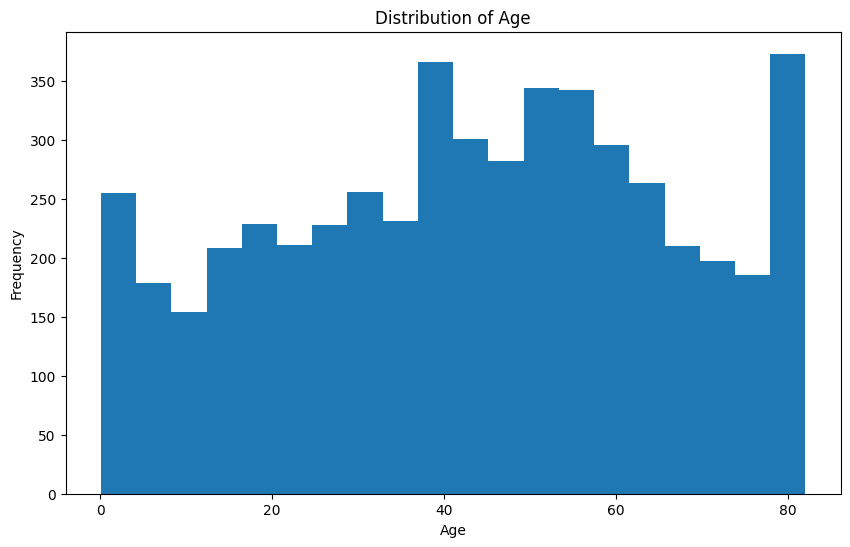

In [86]:
# Histogram- Understanding distribution of age: 

plt.figure(figsize=(10, 6))
plt.hist(stroke_data['age'], bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

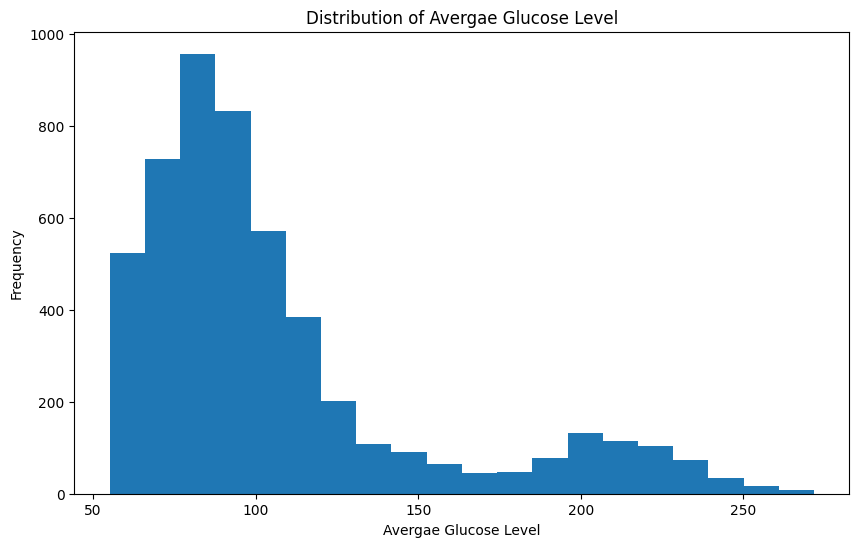

In [87]:
plt.figure(figsize=(10, 6))
plt.hist(stroke_data['avg_glucose_level'], bins=20)
plt.title('Distribution of Avergae Glucose Level')
plt.xlabel('Avergae Glucose Level')
plt.ylabel('Frequency')
plt.show()

In [88]:
## Selecting the columns for the boxplot:

columns_to_plot = ['age', 'avg_glucose_level', 'bmi']


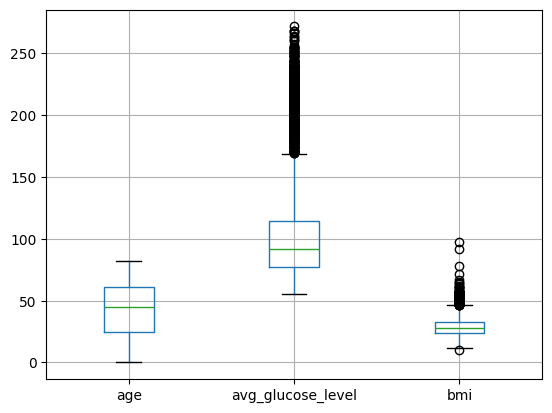

In [89]:
stroke_data.boxplot(column=columns_to_plot)
plt.show()

Text(0.5, 1.0, 'Glucose Level by Stroke')

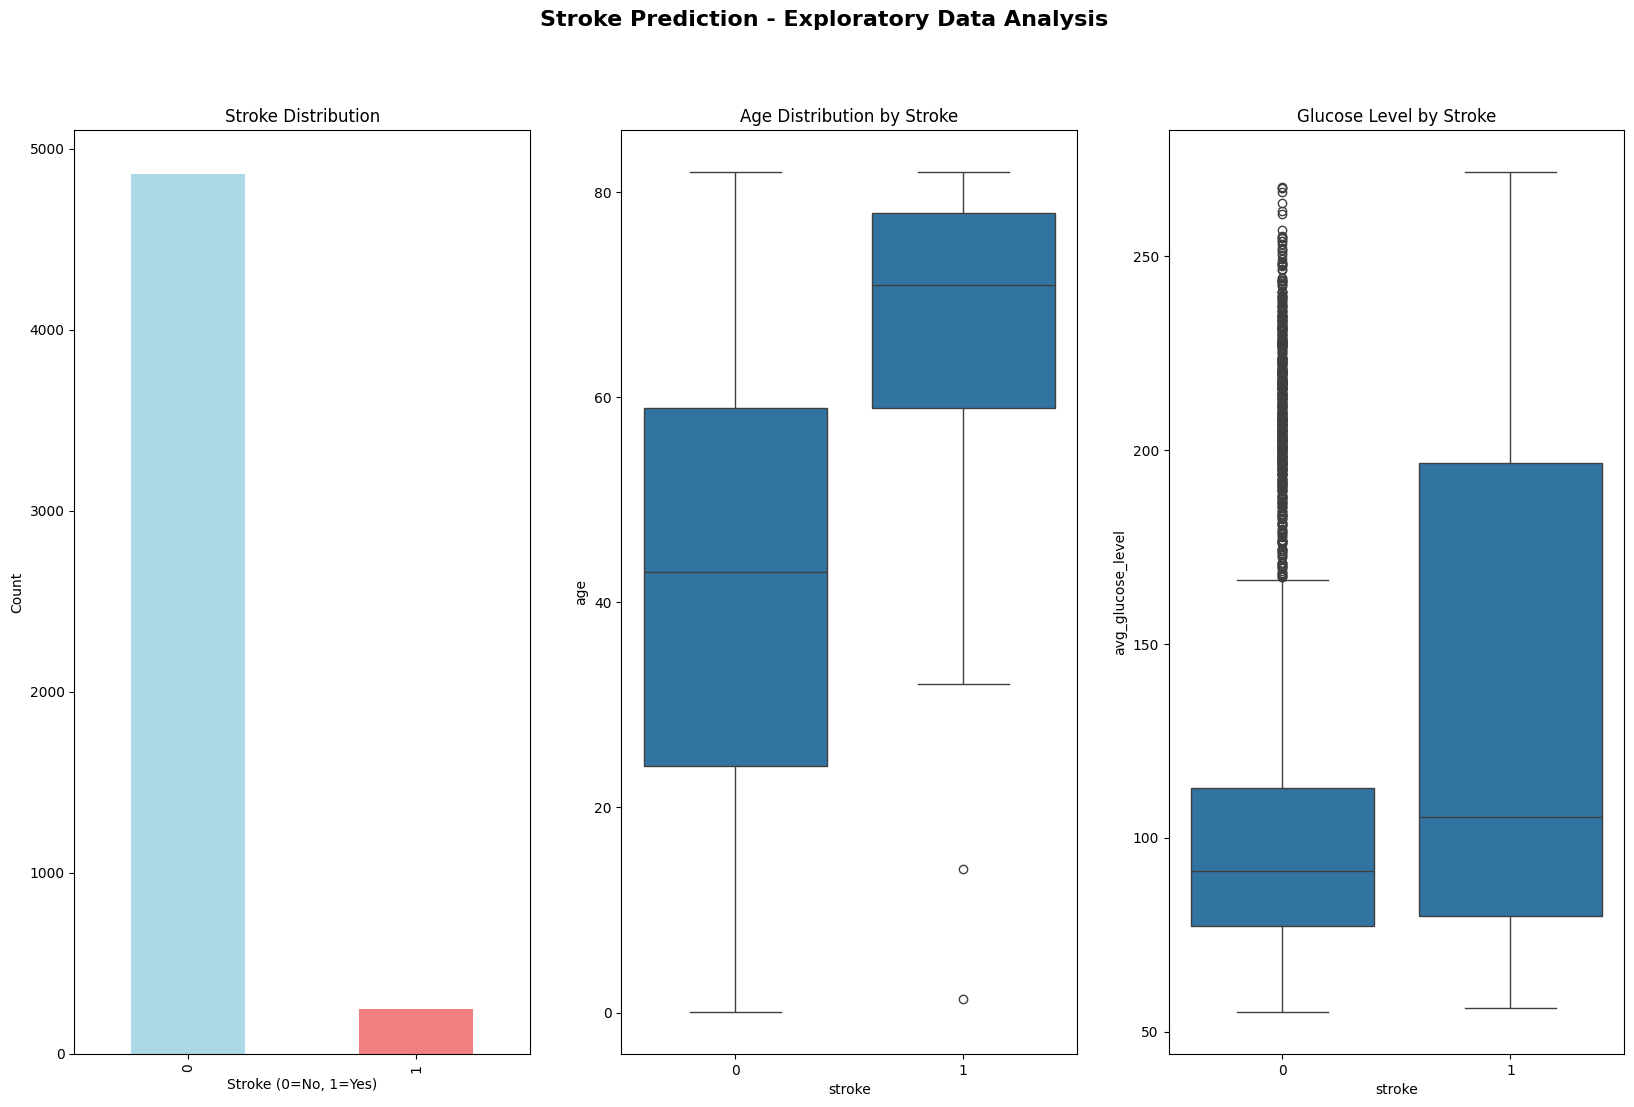

In [90]:
fig, axes = plt.subplots(1, 3, figsize=(20, 12))
fig.suptitle('Stroke Prediction - Exploratory Data Analysis', fontsize=16, fontweight='bold')
        
 # 1. Target distribution
stroke_data['stroke'].value_counts().plot(kind='bar', ax=axes[0], color=['lightblue', 'lightcoral'])
axes[0].set_title('Stroke Distribution')
axes[0].set_xlabel('Stroke (0=No, 1=Yes)')
axes[0].set_ylabel('Count')
        
# 2. Age distribution by stroke
sns.boxplot(data=stroke_data, x='stroke', y='age', ax=axes[1])
axes[1].set_title('Age Distribution by Stroke')
        
# 3. Glucose level distribution
sns.boxplot(data=stroke_data, x='stroke', y='avg_glucose_level', ax=axes[2])
axes[2].set_title('Glucose Level by Stroke')



🔗 Correlation Analysis:


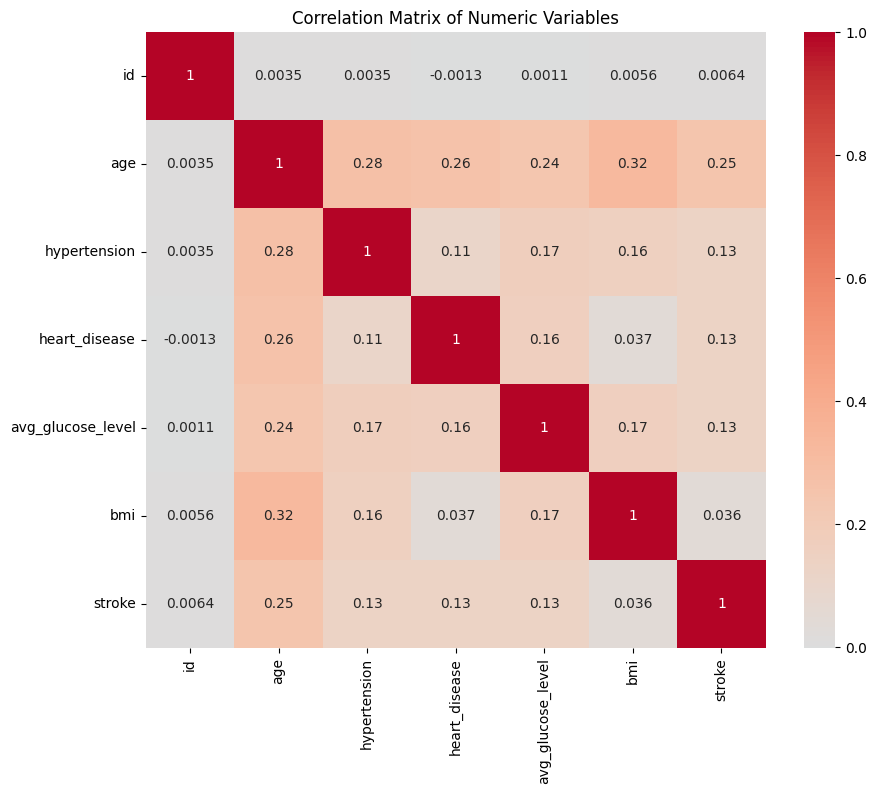

In [91]:
print("\n🔗 Correlation Analysis:")
numeric_cols = stroke_data.select_dtypes(include=[np.number]).columns
correlation_matrix = stroke_data[numeric_cols].corr()
        
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

The heatmap shows a low positive correlation between stroke and other features such as age, blood pressure, glucose level, hypertension, and heart disease. To better understand the features affecting stroke, we will build machine learning models. 

In [92]:
# Dropping the first column 'id' as it is of no use in the analysis:

stroke_data = stroke_data.drop('id', axis=1)

## ✂️ Step 5: Create Two Versions of the Dataset

In [93]:
stroke_data_tree = stroke_data.copy()     # For Random Forest / XGBoost
stroke_data_linear = stroke_data.copy()

### 🔧 Linear Data Transformation (Capping, Scaling, Log)

In [94]:
def cap_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return col.clip(lower, upper)

for col in ['age', 'avg_glucose_level', 'bmi']:
  stroke_data_linear[col] = cap_outliers(stroke_data_linear[col])

# Log transform skewed variables
stroke_data_linear['avg_glucose_level'] = np.log1p(stroke_data_linear['avg_glucose_level'])
stroke_data_linear['bmi'] = np.log1p(stroke_data_linear['bmi'])

In [95]:
# 📌 Encode both datasets
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

stroke_data_tree = pd.get_dummies(stroke_data_tree, columns=categorical_cols, drop_first=True)
stroke_data_linear = pd.get_dummies(stroke_data_linear, columns=categorical_cols, drop_first=True)

# 📌 Scale numeric features (for linear model only)
scaler = StandardScaler()
stroke_data_linear[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(stroke_data_linear[['age', 'avg_glucose_level', 'bmi']])


## 🧪 Step 6: Train/Test Split & Class Balancing (SMOTE)

In [96]:
# For Tree-Based Models
X_tree = stroke_data_tree.drop('stroke', axis=1)
y_tree = stroke_data_tree['stroke']
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, y_tree, stratify=y_tree, test_size=0.2, random_state=42)
X_train_tree_sm, y_train_tree_sm = SMOTE(random_state=42).fit_resample(X_train_tree, y_train_tree)




In [97]:

sm_tree = SMOTE(random_state=42)
X_train_tree_sm, y_train_tree_sm = sm_tree.fit_resample(X_train_tree, y_train_tree)


rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train_tree_sm, y_train_tree_sm)
rf_preds = rf.predict(X_test_tree)
rf_probs = rf.predict_proba(X_test_tree)[:, 1]

print("🔸 Random Forest Results")
print(classification_report(y_test_tree, rf_preds))
print("ROC AUC Score:", roc_auc_score(y_test_tree, rf_probs))


xgb = XGBClassifier(scale_pos_weight=19.5, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_tree_sm, y_train_tree_sm)
xgb_preds = xgb.predict(X_test_tree)
xgb_probs = xgb.predict_proba(X_test_tree)[:, 1]

print("🔸 XGBoost Results")
print(classification_report(y_test_tree, xgb_preds))
print("ROC AUC Score:", roc_auc_score(y_test_tree, xgb_probs))


🔸 Random Forest Results
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       972
           1       0.16      0.16      0.16        50

    accuracy                           0.92      1022
   macro avg       0.56      0.56      0.56      1022
weighted avg       0.92      0.92      0.92      1022

ROC AUC Score: 0.768775720164609
🔸 XGBoost Results
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       972
           1       0.14      0.28      0.19        50

    accuracy                           0.88      1022
   macro avg       0.55      0.60      0.56      1022
weighted avg       0.92      0.88      0.90      1022

ROC AUC Score: 0.7780658436213992


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [23:39:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [98]:
# For Linear Models
X_linear = stroke_data_linear.drop('stroke', axis=1)
y_linear = stroke_data_linear['stroke']
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear, y_linear, stratify=y_linear, test_size=0.2, random_state=42)
X_train_linear_sm, y_train_linear_sm = SMOTE(random_state=42).fit_resample(X_train_linear, y_train_linear)



In [99]:
# 🔹 Apply SMOTE
sm_linear = SMOTE(random_state=42)
X_train_linear_sm, y_train_linear_sm = sm_linear.fit_resample(X_train_linear, y_train_linear)

# 🔹 Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_linear_sm, y_train_linear_sm)
lr_preds = lr.predict(X_test_linear)
lr_probs = lr.predict_proba(X_test_linear)[:, 1]

print("🔸 Logistic Regression Results")
print(classification_report(y_test_linear, lr_preds))
print("ROC AUC Score:", roc_auc_score(y_test_linear, lr_probs))

🔸 Logistic Regression Results
              precision    recall  f1-score   support

           0       0.98      0.76      0.86       972
           1       0.14      0.74      0.23        50

    accuracy                           0.76      1022
   macro avg       0.56      0.75      0.54      1022
weighted avg       0.94      0.76      0.83      1022

ROC AUC Score: 0.8297325102880658


## $ Step 7: Feature Importance

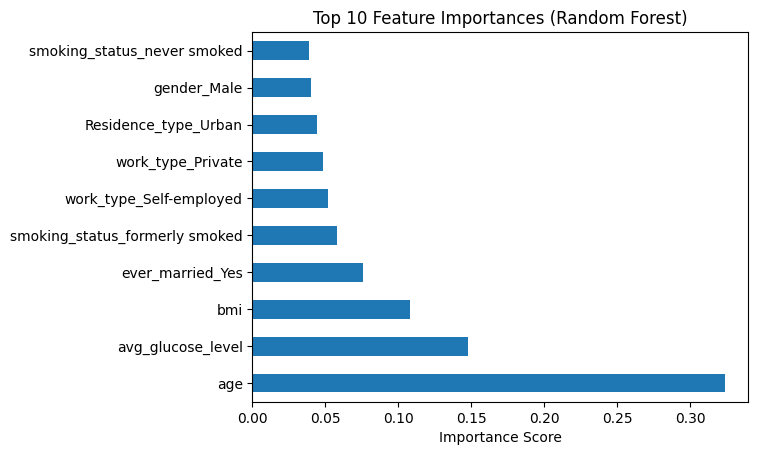

In [100]:
importances = pd.Series(rf.feature_importances_, index=X_tree.columns)
importances.nlargest(10).plot(kind='barh', title='Top 10 Feature Importances (Random Forest)')
plt.xlabel("Importance Score")
plt.show()

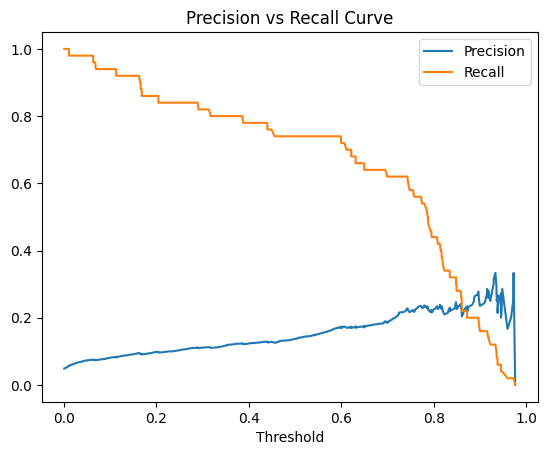

              precision    recall  f1-score   support

           0       0.99      0.66      0.79       972
           1       0.11      0.82      0.20        50

    accuracy                           0.67      1022
   macro avg       0.55      0.74      0.49      1022
weighted avg       0.94      0.67      0.76      1022



In [101]:
from sklearn.metrics import precision_recall_curve

# For best model (e.g., Logistic Regression)
probs = lr.predict_proba(X_test_linear)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test_linear, probs)

# Plot to find a good threshold
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel("Threshold")
plt.legend()
plt.title("Precision vs Recall Curve")
plt.show()

# Trying threshold 0.3
y_pred_thresh = (probs > 0.3).astype(int)
print(classification_report(y_test_linear, y_pred_thresh))


## 📊 Step 7: Evaluation Visualizations

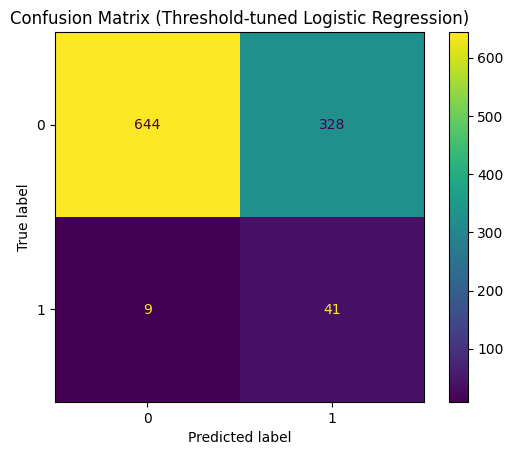

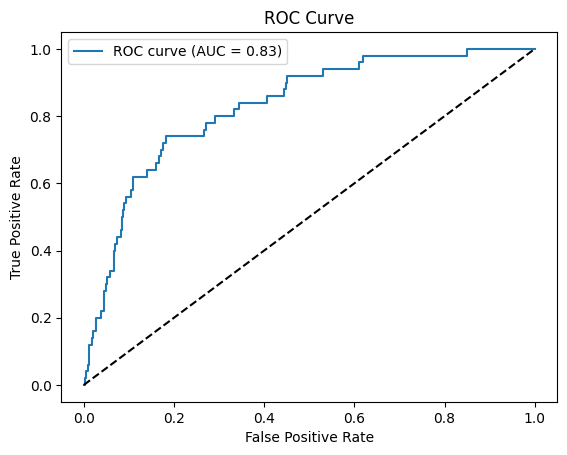

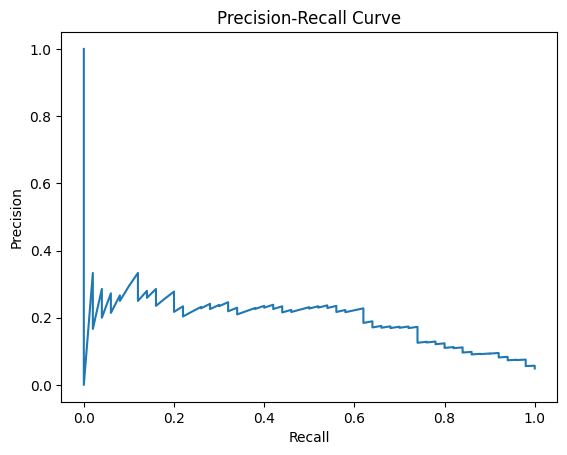

In [102]:
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test_linear, y_pred_thresh)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix (Threshold-tuned Logistic Regression)")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_linear, probs)
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc_score(y_test_linear, probs)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test_linear, probs)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


## 🎯 Step 8: Threshold Tuning and Evaluation

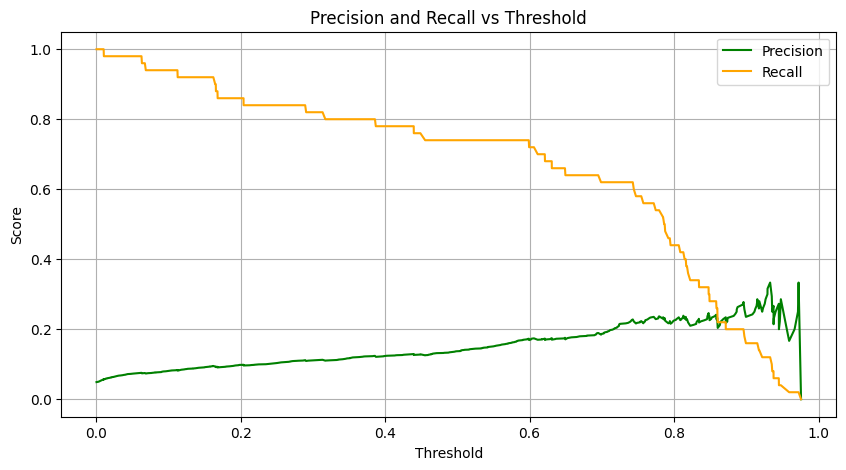

In [103]:
from sklearn.metrics import precision_recall_curve, classification_report

# Step 1: Get probabilities
probs = lr.predict_proba(X_test_linear)[:, 1]  # Assuming logistic regression

# Step 2: Get precision-recall-threshold values
precision, recall, thresholds = precision_recall_curve(y_test_linear, probs)

# Step 3: Plot Precision and Recall vs Threshold
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(thresholds, precision[:-1], label='Precision', color='green')
plt.plot(thresholds, recall[:-1], label='Recall', color='orange')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Threshold")
plt.legend()
plt.grid()
plt.show()


In [104]:
# Trying new threshold
threshold = 0.75
y_pred_thresh = (probs > threshold).astype(int)

# Evaluate
print(f"🔎 Evaluation at Threshold = {threshold}")
print(classification_report(y_test_linear, y_pred_thresh))


🔎 Evaluation at Threshold = 0.75
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       972
           1       0.22      0.58      0.32        50

    accuracy                           0.88      1022
   macro avg       0.60      0.74      0.63      1022
weighted avg       0.94      0.88      0.90      1022



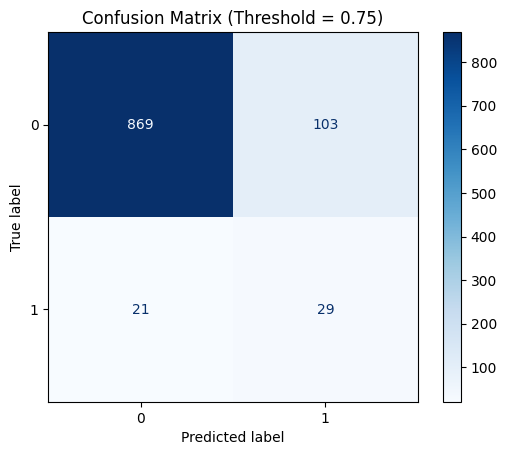

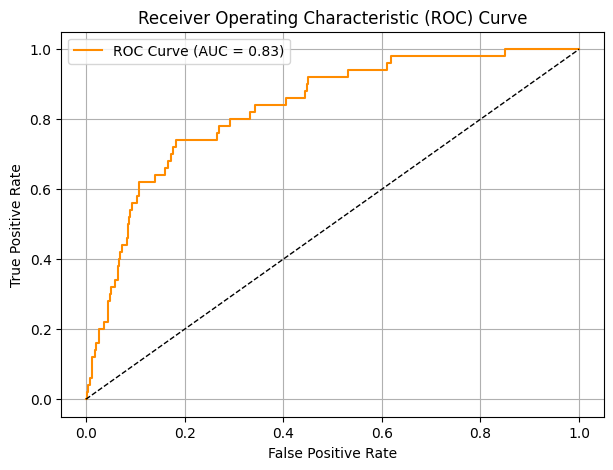

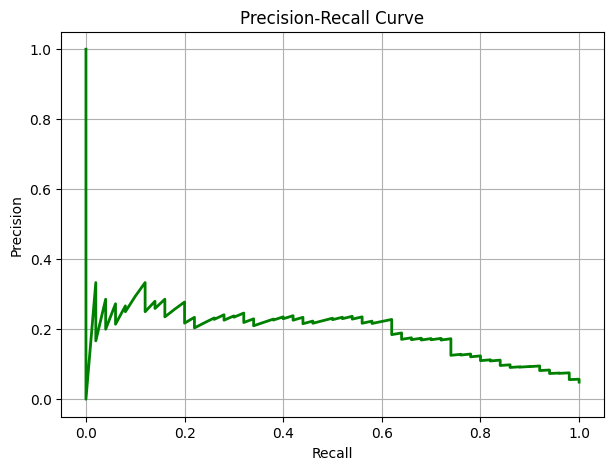

In [105]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, roc_auc_score,
    precision_recall_curve
)

# Final threshold
threshold = 0.75
y_pred_thresh = (probs > threshold).astype(int)

# ========================
# 🔷 1. Confusion Matrix
# ========================
cm = confusion_matrix(y_test_linear, y_pred_thresh)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix (Threshold = {threshold})")
plt.show()

# ========================
# 🟠 2. ROC Curve
# ========================
fpr, tpr, _ = roc_curve(y_test_linear, probs)
auc = roc_auc_score(y_test_linear, probs)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.grid()
plt.show()

# ========================
# 🟢 3. Precision-Recall Curve
# ========================
precision, recall, _ = precision_recall_curve(y_test_linear, probs)

plt.figure(figsize=(7,5))
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid()
plt.show()


## ✅ Conclusion

- The Logistic Regression model, when tuned to a threshold of **0.75**, achieves a better balance between precision and recall compared to the default threshold of 0.5. Specifically, precision improves from around 0.14 to 0.22, while recall moderately decreases from about 0.74 to 0.58. This leads to a higher overall accuracy of 88% and an F1 score increase to 0.32.

- The model’s AUC of approximately **0.83** indicates a strong ability to distinguish stroke cases from non-cases. This threshold tuning helps reduce false positives, which is important to avoid unnecessary alarms, while still identifying a majority of true stroke cases.

- Overall, this balance is crucial in healthcare settings where missing high-risk patients (false negatives) is costly, but too many false alarms (false positives) can also reduce trust in the model. Thus, threshold 0.75 offers a practical tradeoff for stroke detection.
